In [1504]:
#Loading
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
#Modeling
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#Visual
import matplotlib.pyplot as plt
import seaborn as sns
#For TfIdf
from scipy.sparse import csr_matrix, hstack, vstack
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy

In [1505]:
df = pd.read_csv('piter_filtered.csv')

In [1506]:
df.head(5)

,Latitude,Longitude,City,Area,Address,Rooms,Floor/Total floors,Material,Total area,Live area,Kitchen,Toilet type,Price,Link,Seller,Comment
0,59.911448,30.308232,Санкт-Петербург,Адмиралтейский район,Измайловский пр. 16,1,4/7,СФ,28.8,19.3,3.0,Р,2750,http://www.bn.ru/detail/flats/1133049.html,АН Панорама,"доля, торг, ОС в коммун. кв"
1,59.939095,30.315868,Санкт-Петербург,Адмиралтейский район,Грибоедова кан. наб. 144,1,1/5,СФК,27.0,18.5,4.0,С,3455,http://www.bn.ru/detail/flats/668279.html,Аристократ,ХС. ДГ. Более 3-х лет.
2,59.920230,30.283214,Санкт-Петербург,Адмиралтейский район,Володи Ермака ул. 17,1,1/6,К,42.0,26.0,9.0,Р,3700,http://www.bn.ru/detail/flats/1141100.html,Рудаков-Н,высок эт
3,59.917231,30.284741,Санкт-Петербург,Адмиралтейский район,Садовая ул. 122,1,1/4,К,31.0,16.9,9.0,С,3800,http://www.bn.ru/detail/flats/1182387.html,Итака,"1-27218 ХС, ПП"
4,59.919545,30.280834,Санкт-Петербург,Адмиралтейский район,Псковская ул. 22,1,5/6,К,29.3,16.7,5.0,Р,4000,http://www.bn.ru/detail/flats/1141107.html,Итака,1-22690 ХСб3лБалкВанная


In [1507]:
df.shape

(6212, 16)

In [1508]:
df = df.drop(df[df['Price']>15000].index)
df = df.drop(df[df['Price']<1000].index)
df = df.drop(df[df['Live area']>100].index)
df = df.drop(df[df['Total area']>270].index)
df = df.drop(df[df['Longitude']<27].index)
df = df.drop(df[df['Longitude']>31.5].index)
df = df.drop(df[df['Latitude']<56.9].index)
df = df.drop(df[df['Latitude']>60.99].index)
# df = df.drop(df[df['Seller']=='Итака'].index)

# def del_out(df):
#     # print ("Size of df before drop : {}".format(df.shape))
#     # before = df.shape[0]
    
#     df = df.drop(df[df['Kitchen']>50].index)
#     df = df.drop(df[df['Live area']>150].index)
#     df = df.drop(df[df['Total area']>249].index)
#     df = df.drop(df[df['Rooms']>6].index)
#     df = df.drop(df[df['Longitude']>32].index)
#     df = df.drop(df[df['Longitude']<28.7].index)
#     df = df.drop(df[df['Latitude']<59].index)
#     df = df.drop(df[df['Latitude']>60.5].index)
#     df = df.drop(df[df['Price']>30000].index)
#     df = df.drop(df[df['Price']<1000].index)

#     # after = df.shape[0]
#     # print ("Size of df after drop : {}".format(df.shape))
#     # print ("Dropped : {}".format(before after))
#     # print ("Percent dropped : {}".format(df.shape))

In [1509]:
df.shape

(5871, 16)

In [1510]:
def get_one_hot(df, cols):
  df = pd.get_dummies(data = df, columns = cols)
  print ("\nOne_hot for : {} done.".format(cols))

  return df

In [1511]:
def prepare_data(data):
  data.drop(['City', 'Floor/Total floors', 'Link', 'Comment', 'Seller', 'Address'], axis = 1, inplace = True)#'Material' 'Address','Seller',
  y = data['Price']
  data.drop('Price', axis = 1, inplace = True)

  return data, y

In [1512]:
df.head(1)

,Latitude,Longitude,City,Area,Address,Rooms,Floor/Total floors,Material,Total area,Live area,Kitchen,Toilet type,Price,Link,Seller,Comment
0,59.911448,30.308232,Санкт-Петербург,Адмиралтейский район,Измайловский пр. 16,1,4/7,СФ,28.8,19.3,3.0,Р,2750,http://www.bn.ru/detail/flats/1133049.html,АН Панорама,"доля, торг, ОС в коммун. кв"


In [1513]:
cols = ['Material', 'Area', 'Toilet type']
df = get_one_hot(df, cols)


One_hot for : ['Material', 'Area', 'Toilet type'] done.


In [1514]:
df.head(10)

,Latitude,Longitude,City,Address,Rooms,Floor/Total floors,Total area,Live area,Kitchen,Price,...,Area_Центральный район,Toilet type_2,Toilet type_3,Toilet type_,Toilet type_Б/В,Toilet type_В/К,Toilet type_Д,Toilet type_Д/К,Toilet type_Р,Toilet type_С
0,59.911448,30.308232,Санкт-Петербург,Измайловский пр. 16,1,4/7,28.8,19.3,3.0,2750,...,0,0,0,0,0,0,0,0,1,0
1,59.939095,30.315868,Санкт-Петербург,Грибоедова кан. наб. 144,1,1/5,27.0,18.5,4.0,3455,...,0,0,0,0,0,0,0,0,0,1
2,59.920230,30.283214,Санкт-Петербург,Володи Ермака ул. 17,1,1/6,42.0,26.0,9.0,3700,...,0,0,0,0,0,0,0,0,1,0
3,59.917231,30.284741,Санкт-Петербург,Садовая ул. 122,1,1/4,31.0,16.9,9.0,3800,...,0,0,0,0,0,0,0,0,0,1
4,59.919545,30.280834,Санкт-Петербург,Псковская ул. 22,1,5/6,29.3,16.7,5.0,4000,...,0,0,0,0,0,0,0,0,1,0
5,59.917231,30.284741,Санкт-Петербург,Садовая ул. 122,1,1/4,30.6,17.0,6.0,4000,...,0,0,0,0,0,0,0,0,0,1
6,59.925655,30.305870,Санкт-Петербург,Б. Подьяческая ул. 8,1,1/5,43.5,24.5,6.7,4070,...,0,0,0,0,0,0,0,0,1,0
7,59.915977,30.328992,Санкт-Петербург,Рузовская ул. 19,1,1/6,47.0,18.2,14.6,4200,...,0,0,0,0,0,0,0,0,0,1
8,59.915675,30.297884,Санкт-Петербург,Троицкий пр. 20,1,5/5,33.3,15.4,7.3,4554,...,0,0,0,0,0,0,0,0,1,0
9,59.906012,30.276522,Санкт-Петербург,Старо-­Петергофский пр. 28,1,4/5,35.4,29.9,8.0,4708,...,0,0,0,0,0,0,0,0,0,1


In [1515]:
# df.info()

In [1516]:
df, y = prepare_data(df)

In [1517]:
reg = LinearRegression()

In [1518]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_score(model.predict(X_test), y_test)

0.7826590203422641

In [1519]:
mean_squared_error(model.predict(X_test), y_test)

1296133.12543321

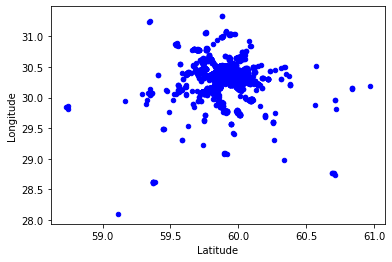

In [1520]:
ax1 = df.plot.scatter(x='Latitude', y='Longitude', c='Blue')

# Удаление 99% данных
* df = df.drop(df[df['Kitchen']>50].index)
* df = df.drop(df[df['Price']>30000].index)
* df = df.drop(df[df['Price']<1000].index)
* df = df.drop(df[df['Live area']>150].index)
* df = df.drop(df[df['Total area']>249].index)
* df = df.drop(df[df['Rooms']>6].index)
* df = df.drop(df[df['Longitude']>29].index)
* df = df.drop(df[df['Longitude']<25].index)
* df = df.drop(df[df['Latitude']<55].index)
* df = df.drop(df[df['Latitude']>59.99].index)

r2 = 0.9923292650473075
error = 9295.967408743665

# Удаление 5% данных
* df = df.drop(df[df['Price']>15000].index)
* df = df.drop(df[df['Price']<1000].index)
* df = df.drop(df[df['Live area']>125].index)
* df = df.drop(df[df['Total area']>210].index)
* df = df.drop(df[df['Longitude']<27].index)
* df = df.drop(df[df['Longitude']>31.5].index)
* df = df.drop(df[df['Latitude']<57.5].index)
* df = df.drop(df[df['Latitude']>60.99].index)

r2 = 0.7805079441639863
error = 1324851.5458184504